In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 简易画图

<function matplotlib.pyplot.show(close=None, block=None)>

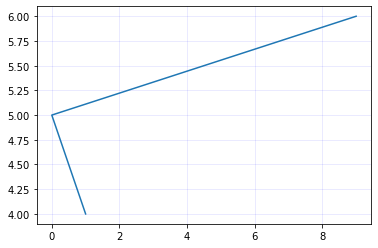

In [2]:
#在jupyter中执行的时候显示图片
%matplotlib inline
# 设定坐标？
plt.plot([1,0,9],[4,5,6])
#显示网格线
plt.grid(alpha= 0.1, color = 'blue')
plt.show

In [3]:
df1 = pd.read_excel('./data/销售数据.xlsx',index_col='序号')
df1.head()

,user_id,user_name,chann_id,city_id,system,age,phonenum,sex,创建时间,platform,国家,地区,省份,city,chann_name,订单量,销量,消费金额,实付金额
序号,,,,,,,,,,,,,,,,,,,
1,10013788,敖大戴,guide_01,city0138,IOS,46,152****6601,女,2017-03-25,APP,中国,华北,河北,南宫,hao123,6,28,13014.6,12614.6
2,10048735,浦葛卫之翼环城店一一柯晓闫,union_03,city0548,IOS,60,171****1663,女,2017-10-25,APP,中国,中南,湖南,耒阳,百度网盟,4,36,28839.2,26979.2
3,10062827,亡命天涯不如早点回卜。,search_02,city0061,Android,54,180****9153,女,2018-01-18,APP,中国,东北,吉林,辉南,百度联盟,4,16,4294.8,4294.8
4,10066683,闵屈戎,union_01,city0454,IOS,32,133****1258,男,2018-02-10,APP,中国,中南,广东,台城,360网盟,4,19,3552.4,3512.4
5,10294804,姚建平AzQoe545,platform_01,city0133,PC,33,184****3820,女,2019-08-30,PC,中国,华北,河北,邯郸,今日头条,4,12,1582.5,1392.5


### 提取年月作为新列

In [4]:
df1['date1'] = pd.to_datetime(df1['创建时间']).apply(lambda x:x.strftime('%Y-%m'))
df1.head()

,user_id,user_name,chann_id,city_id,system,age,phonenum,sex,创建时间,platform,国家,地区,省份,city,chann_name,订单量,销量,消费金额,实付金额,date1
序号,,,,,,,,,,,,,,,,,,,,
1,10013788,敖大戴,guide_01,city0138,IOS,46,152****6601,女,2017-03-25,APP,中国,华北,河北,南宫,hao123,6,28,13014.6,12614.6,2017-03
2,10048735,浦葛卫之翼环城店一一柯晓闫,union_03,city0548,IOS,60,171****1663,女,2017-10-25,APP,中国,中南,湖南,耒阳,百度网盟,4,36,28839.2,26979.2,2017-10
3,10062827,亡命天涯不如早点回卜。,search_02,city0061,Android,54,180****9153,女,2018-01-18,APP,中国,东北,吉林,辉南,百度联盟,4,16,4294.8,4294.8,2018-01
4,10066683,闵屈戎,union_01,city0454,IOS,32,133****1258,男,2018-02-10,APP,中国,中南,广东,台城,360网盟,4,19,3552.4,3512.4,2018-02
5,10294804,姚建平AzQoe545,platform_01,city0133,PC,33,184****3820,女,2019-08-30,PC,中国,华北,河北,邯郸,今日头条,4,12,1582.5,1392.5,2019-08


### 按年月分组汇总实付金额

In [5]:
data = df1.groupby('date1').agg({'实付金额':'sum'})
data

,实付金额
date1,
2017-01,1370423.77
2017-02,924894.29
2017-03,970353.12
2017-04,1005358.02
2017-05,1020072.03
2017-06,792762.80
2017-07,965713.49
2017-08,1686160.46
2017-09,930084.36


### 绘制折线图
x轴为时间，y轴为度量

In [6]:
#提取出x轴数据
data.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01'],
      dtype='object', name='date1')

In [7]:
#提取出y轴数据
data.values

array([[1370423.77],
       [ 924894.29],
       [ 970353.12],
       [1005358.02],
       [1020072.03],
       [ 792762.8 ],
       [ 965713.49],
       [1686160.46],
       [ 930084.36],
       [1223555.09],
       [ 851891.82],
       [1014548.15],
       [ 932139.7 ],
       [ 917804.62],
       [ 961278.37],
       [ 863668.63],
       [ 763845.79],
       [ 945946.49],
       [ 898371.69],
       [ 881358.69],
       [ 934588.89],
       [1034735.  ],
       [1004133.4 ],
       [ 898678.45],
       [5538527.55],
       [4309440.64],
       [4855102.92],
       [4434723.54],
       [3573124.37],
       [3720854.86],
       [3023434.03],
       [4549412.56],
       [6101978.15],
       [6250759.27],
       [4849798.12],
       [4009201.04],
       [1329667.77]])

### 绘制折线图
要求：x轴为列表，y轴为列表

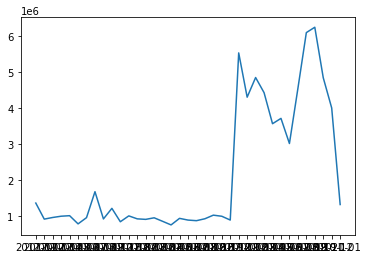

In [8]:
x = data.index.tolist() #x轴位置
y = data.values.tolist() #y轴位置
#导入x和y，通过plot画折线图
plt.plot(x,y)
plt.show()

上图中x轴刻度重叠严重，可以更改图片大小

### 设置图片大小


设置图片大小
figsize：指定figure的宽和高，单位是英寸
dpi参数指定绘图对象的分辨率，即每英寸多少像素，A4纸尺寸是21*30cm
设置画布对象如下
plt.figure(figsize=(20,8),dpi=80)


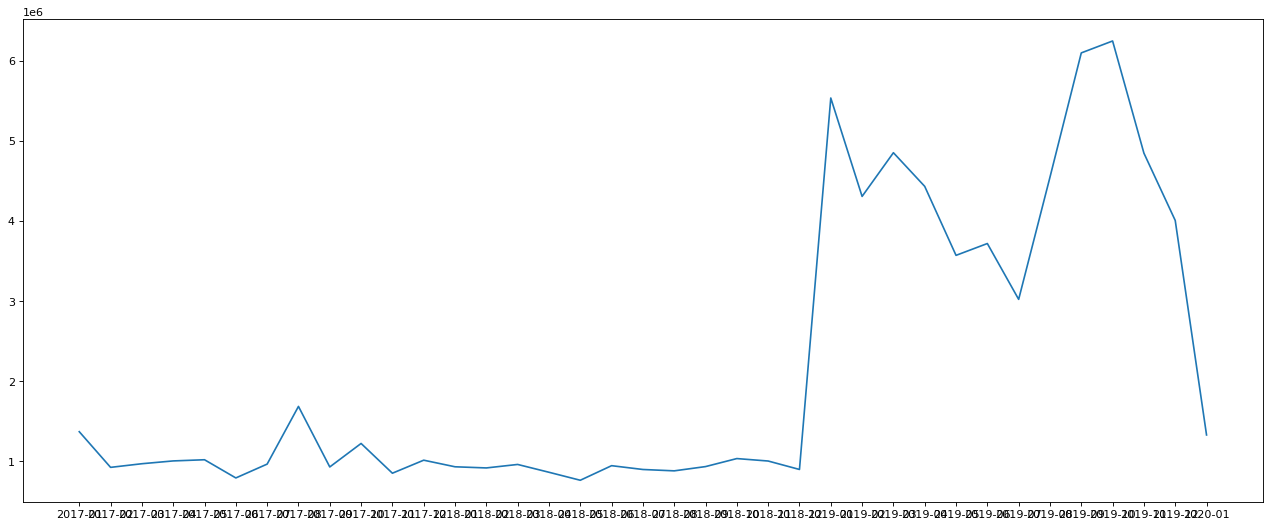

In [9]:
plt.figure(figsize=(20,8),dpi = 80)
x = data.index.tolist() #x轴位置
y = data.values.tolist() #y轴位置
#导入x和y，通过plot画折线图
plt.plot(x,y)
plt.show()

上图刻度依然紧密，预习资料说可以调整刻度的角度

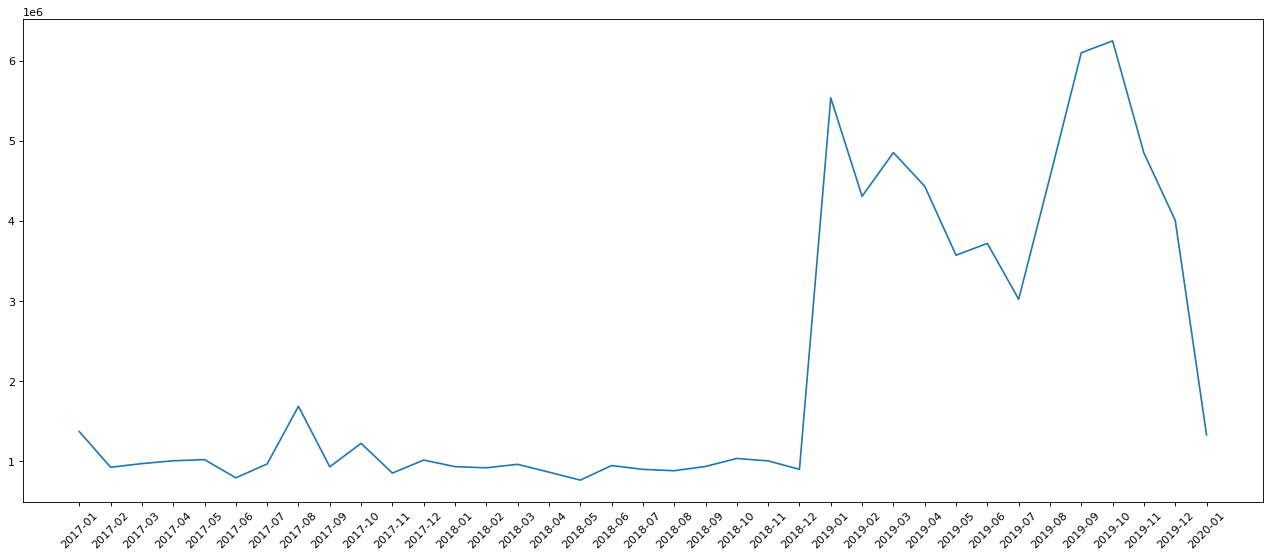

In [10]:
plt.figure(figsize=(20,8),dpi = 80)
x = data.index.tolist() #x轴位置
y = data.values.tolist() #y轴位置
#调整x轴显示角度
plt.xticks(rotation = 45)
#导入x和y，通过plot画折线图
plt.plot(x,y)
plt.show()

### 改变绘图的轴、刻度线和标签的颜色

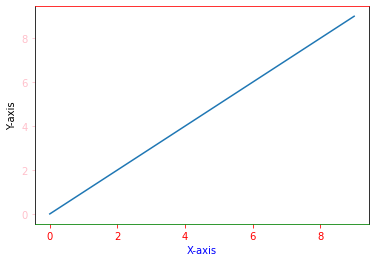

In [11]:
#创建一个新的图形窗口
fig = plt.figure()
#在新的图形窗口中创建一个子图，返回一个AxesSubplot对象，111表示讲图形窗口划分成一个行1列1位置为1的子图网格
ax = fig.add_subplot(111)

ax.plot(range(10))
#设置x轴标题和y轴标题
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
#设置颜色
ax.spines['bottom'].set_color('green')
ax.spines['top'].set_color('red')
ax.xaxis.label.set_color('blue')
#设置x轴y轴颜色
ax.tick_params(axis = 'x',colors='red')
ax.tick_params(axis = 'y',colors='pink')

plt.show( )

### 折线的颜色
基础属性设置
color = 'red' ：折线的颜色
alpha = 0.5  ：折线的透明度（0-1）
linestyle = '--'：折线的样式
linewidth = 3：折线的宽度

线的样式

-实线(solid)
--短线(dashed)
-.短点相间线(dashdot)
\: 虚点线(dotted)

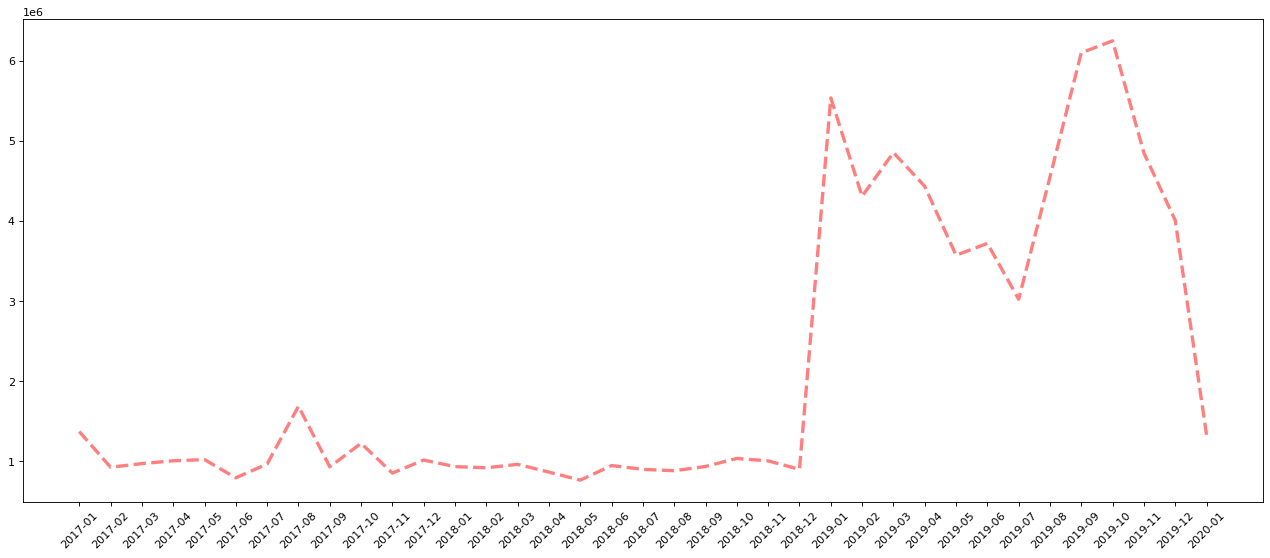

In [12]:
plt.figure(figsize=(20,8),dpi = 80)
x = data.index.tolist() #x轴位置
y = data.values.tolist() #y轴位置
#调整x轴显示角度
plt.xticks(rotation = 45)
#导入x和y，通过plot画折线图
plt.plot(x,y,color = 'red', alpha=0.5, linestyle='--',linewidth = 3)
plt.show()

折点形状选择
折点形状使用marker参数进行调整

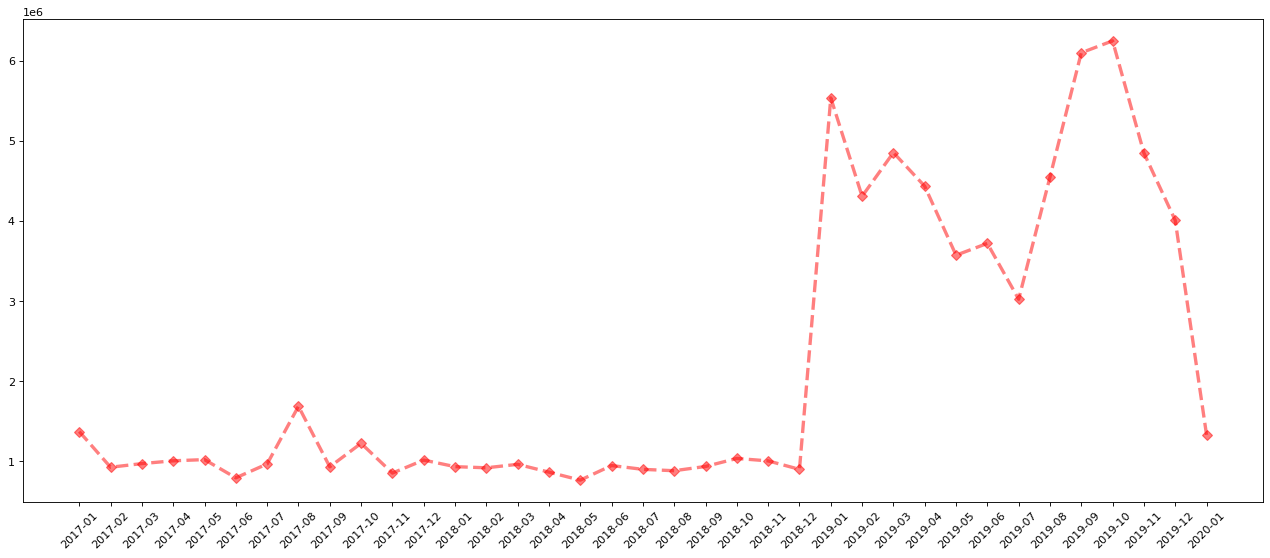

In [13]:
plt.figure(figsize=(20,8),dpi = 80)
x = data.index.tolist() #x轴位置
y = data.values.tolist() #y轴位置
#调整x轴显示角度
plt.xticks(rotation = 45)
#导入x和y，通过plot画折线图
plt.plot(x,y,color = 'red', alpha=0.5, linestyle='--',linewidth = 3,marker = 'D')
plt.show()

In [14]:
List=[7,8,9,10,11,19,20,16]
target=21
for i in range(len(List)):
    for j in range(len(List)-1,i,-1):
        if List[i] + List[j] == target:
            print([i,j])


[3, 4]


In [15]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        for i in range(len(nums)):

            for j in  range(len(nums)-1,i,-1):

                if List[i]+List[j] == target:
                    print([i,j])

Solution.twoSum(num=[1,2,3,4,5,6,7],target=)
# Solution.twoSum(nums=[7,8,9,10,11,19,20,16],target=19)

SyntaxError: invalid syntax (Temp/ipykernel_12884/2302834390.py, line 10)